In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
import scipy.stats as spst

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')  

In [2]:
seoul_moving = pd.read_csv('1.2 seoul_moving_month_4.csv',sep=",", index_col = 0, encoding = 'UTF-8')

In [28]:
seoul_moving

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),출발,도착
0,202204,일,0,11010,11010,F,0,EE,10,28.02,종로구,종로구
1,202204,일,0,11010,11010,F,0,EH,10,27.52,종로구,종로구
2,202204,일,0,11010,11010,F,0,HE,10,27.83,종로구,종로구
3,202204,일,0,11010,11010,F,10,HW,10,6.05,종로구,종로구
4,202204,일,0,11010,11010,F,10,EH,90,5.95,종로구,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...
968458,202204,토,23,39000,11250,M,45,EH,50,3.16,NaN,강동구
968459,202204,토,23,39000,11250,M,50,EH,70,3.27,NaN,강동구
968460,202204,토,23,39000,11250,M,55,EE,50,3.31,NaN,강동구
968461,202204,토,23,39000,11250,M,55,EH,50,3.28,NaN,강동구


In [4]:
seoul_moving.describe()

,대상연월,도착시간,출발 시군구 코드,도착 시군구 코드,나이,평균 이동 시간(분)
count,28923054.0,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07
mean,202204.0,1.365597e+01,1.712362e+04,1.719750e+04,4.279614e+01,3.279829e+01
std,0.0,5.849675e+00,9.046478e+03,9.063818e+03,1.777485e+01,2.584213e+01
min,202204.0,0.000000e+00,1.101000e+04,1.101000e+04,0.000000e+00,1.000000e+01
25%,202204.0,1.000000e+01,1.110000e+04,1.111000e+04,3.000000e+01,2.000000e+01
50%,202204.0,1.400000e+01,1.120000e+04,1.120000e+04,4.500000e+01,3.000000e+01
75%,202204.0,1.800000e+01,3.101400e+04,3.102100e+04,5.500000e+01,4.000000e+01
max,202204.0,2.300000e+01,3.900000e+04,3.900000e+04,8.000000e+01,7.700000e+02


In [5]:
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95


In [6]:
seoul_moving.tail()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
968458,202204,토,23,39000,11250,M,45,EH,50,3.16
968459,202204,토,23,39000,11250,M,50,EH,70,3.27
968460,202204,토,23,39000,11250,M,55,EE,50,3.31
968461,202204,토,23,39000,11250,M,55,EH,50,3.28
968462,202204,토,23,39000,11250,M,75,EH,30,5.94


In [7]:
seoul_moving.replace("*","2", inplace=True)
seoul_moving = seoul_moving.astype({'이동인구(합)':'float'})

seoul_moving['출발'] = seoul_moving['출발 시군구 코드'].map({
    11010 : '종로구'
    ,11020 : '중구'
    , 11030 : '용산구'
    , 11040	: '성동구'
    , 11050	: '광진구'
    , 11060	: '동대문구'
    , 11070	: '중랑구'
    , 11080	: '성북구'
    , 11090	: '강북구'
    , 11100	: '도봉구'
    , 11110	: '노원구'
    , 11120	: '은평구'
    , 11130	: '서대문구'
    , 11140	: '마포구'
    , 11150	: '양천구'
    , 11160	: '강서구'
    , 11170	: '구로구'
    , 11180	: '금천구'
    , 11190	: '영등포구'
    , 11200	: '동작구'
    , 11210	: '관악구'
    , 11220	: '서초구'
    , 11230	: '강남구'
    , 11240	: '송파구'
    , 11250	: '강동구' 
})

seoul_moving['도착'] = seoul_moving['도착 시군구 코드'].map({
    11010 : '종로구'
    ,11020 : '중구'
    , 11030 : '용산구'
    , 11040	: '성동구'
    , 11050	: '광진구'
    , 11060	: '동대문구'
    , 11070	: '중랑구'
    , 11080	: '성북구'
    , 11090	: '강북구'
    , 11100	: '도봉구'
    , 11110	: '노원구'
    , 11120	: '은평구'
    , 11130	: '서대문구'
    , 11140	: '마포구'
    , 11150	: '양천구'
    , 11160	: '강서구'
    , 11170	: '구로구'
    , 11180	: '금천구'
    , 11190	: '영등포구'
    , 11200	: '동작구'
    , 11210	: '관악구'
    , 11220	: '서초구'
    , 11230	: '강남구'
    , 11240	: '송파구'
    , 11250	: '강동구' 
})

seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28923054 entries, 0 to 968462
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발 시군구 코드    int64  
 4   도착 시군구 코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균 이동 시간(분)  int64  
 9   이동인구(합)      float64
 10  출발           object 
 11  도착           object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.8+ GB


In [8]:
seoul_moving['이동유형'].value_counts()

EH    5757073
HE    5520005
EE    5085099
WH    3108026
WE    2809148
HW    2695189
EW    2304535
WW    1026134
HH     617845
Name: 이동유형, dtype: int64

In [9]:
seoul_moving['요일'].value_counts()

토    4690806
금    4641881
목    4011291
수    3955646
화    3926876
월    3906272
일    3790282
Name: 요일, dtype: int64

In [10]:
seoul_moving['성별'].value_counts()

M    16355029
F    12568025
Name: 성별, dtype: int64

In [11]:
# 심야 최다 이동 요일
night = seoul_moving.loc[seoul_moving['도착시간'] <= 5]
night['요일'].value_counts()


토    501891
금    435296
일    383611
목    377407
수    371376
화    359741
월    338716
Name: 요일, dtype: int64

In [12]:
# 서울출발 ~ 서울도착
only_seoul = seoul_moving.loc[(seoul_moving['출발 시군구 코드'] < 20000) & (seoul_moving['도착 시군구 코드'] < 20000)]
only_seoul

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),출발,도착
0,202204,일,0,11010,11010,F,0,EE,10,28.02,종로구,종로구
1,202204,일,0,11010,11010,F,0,EH,10,27.52,종로구,종로구
2,202204,일,0,11010,11010,F,0,HE,10,27.83,종로구,종로구
3,202204,일,0,11010,11010,F,10,HW,10,6.05,종로구,종로구
4,202204,일,0,11010,11010,F,10,EH,90,5.95,종로구,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...
920410,202204,토,23,11250,11250,M,80,WH,10,85.10,강동구,강동구
920411,202204,토,23,11250,11250,M,80,EH,10,28.36,강동구,강동구
920412,202204,토,23,11250,11250,M,80,EE,20,37.99,강동구,강동구
920413,202204,토,23,11250,11250,M,80,HE,10,9.42,강동구,강동구


In [13]:
tmp_st = only_seoul.groupby(by=['출발'], as_index=False)['이동인구(합)'].sum()
tmp_ed = only_seoul.groupby(by=['도착'], as_index=False)['이동인구(합)'].sum()

In [14]:
tmp_st

,출발,이동인구(합)
0,강남구,46238473.13
1,강동구,22052709.11
2,강북구,13101069.78
3,강서구,22544291.94
4,관악구,19725124.55
5,광진구,18692751.33
6,구로구,15054567.72
7,금천구,8482663.48
8,노원구,21410331.69
9,도봉구,11269379.27


In [15]:
tmp_ed

,도착,이동인구(합)
0,강남구,46170267.40
1,강동구,22014206.89
2,강북구,13096395.71
3,강서구,22789004.72
4,관악구,19718658.80
5,광진구,18732568.44
6,구로구,15028480.32
7,금천구,8468310.47
8,노원구,21389936.36
9,도봉구,11260109.02


In [16]:
out_max_county = tmp_st.loc[tmp_st['이동인구(합)'] == tmp_st['이동인구(합)'].max()]
out_min_county = tmp_st.loc[tmp_st['이동인구(합)'] == tmp_st['이동인구(합)'].min()]

in_max_county = tmp_ed.loc[tmp_ed['이동인구(합)'] == tmp_ed['이동인구(합)'].max()]
in_min_county = tmp_ed.loc[tmp_ed['이동인구(합)'] == tmp_ed['이동인구(합)'].min()]
print(f'유출 max : {out_max_county}')
print()
print(f'유출 min : {out_min_county}')
print()
print(f'유입 max : {in_max_county}')
print()
print(f'유입 min : {in_min_county}')
print()

유출 max :     출발      이동인구(합)
0  강남구  46238473.13

유출 min :     출발     이동인구(합)
7  금천구  8482663.48

유입 max :     도착     이동인구(합)
0  강남구  46170267.4

유입 min :     도착     이동인구(합)
7  금천구  8468310.47



In [17]:
# 낮 시간 버스 이용
day = only_seoul.loc[only_seoul['도착시간'] > 5]
day

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),출발,도착
0,202204,일,6,11010,11010,F,0,WH,10,28.03,종로구,종로구
1,202204,일,6,11010,11010,F,0,HE,10,28.28,종로구,종로구
2,202204,일,6,11010,11010,F,10,HW,30,6.05,종로구,종로구
3,202204,일,6,11010,11010,F,10,HE,30,5.88,종로구,종로구
4,202204,일,6,11010,11010,F,15,HW,10,8.10,종로구,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...
920410,202204,토,23,11250,11250,M,80,WH,10,85.10,강동구,강동구
920411,202204,토,23,11250,11250,M,80,EH,10,28.36,강동구,강동구
920412,202204,토,23,11250,11250,M,80,EE,20,37.99,강동구,강동구
920413,202204,토,23,11250,11250,M,80,HE,10,9.42,강동구,강동구


In [18]:
# 도착 기준 이동평균 시간 / 인구합
arrival_mean = only_seoul.groupby(by=['도착'], as_index=False)[['평균 이동 시간(분)', '이동인구(합)']].mean()
arrival_sum = only_seoul.groupby(by=['도착'], as_index=False)[['평균 이동 시간(분)', '이동인구(합)']].sum()

In [19]:
# arrival_mean.rename(columns={'평균 이동 시간(분)':'이동 시간(분)_평균'
#                              , '이동인구(합)':'이동인구(합)_평균' }
#                     , inplace=True)
arrival_mean

,도착,평균 이동 시간(분),이동인구(합)
0,강남구,23.284573,83.309306
1,강동구,26.108477,59.889404
2,강북구,24.282441,36.281421
3,강서구,25.496986,54.208682
4,관악구,23.842468,46.586809
5,광진구,22.779081,43.712430
6,구로구,23.480408,38.895596
7,금천구,24.394485,28.730583
8,노원구,24.497542,51.091182
9,도봉구,25.102882,35.099543


In [20]:
arrival_sum.rename(columns={'평균 이동 시간(분)':'총 이동 시간'
                             , '이동인구(합)':'총 이동인구' }
                    , inplace=True)
arrival_sum

,도착,총 이동 시간,총 이동인구
0,강남구,12904380,46170267.40
1,강동구,9596980,22014206.89
2,강북구,8765160,13096395.71
3,강서구,10718780,22789004.72
4,관악구,10091730,19718658.80
5,광진구,9761770,18732568.44
6,구로구,9072360,15028480.32
7,금천구,7190250,8468310.47
8,노원구,10256190,21389936.36
9,도봉구,8053130,11260109.02


In [21]:
arrival = pd.merge(arrival_mean, arrival_sum, on='도착')
arrival.to_csv('df_seoul_moving.csv', index = False)
arrival

,도착,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,강남구,23.284573,83.309306,12904380,46170267.40
1,강동구,26.108477,59.889404,9596980,22014206.89
2,강북구,24.282441,36.281421,8765160,13096395.71
3,강서구,25.496986,54.208682,10718780,22789004.72
4,관악구,23.842468,46.586809,10091730,19718658.80
5,광진구,22.779081,43.712430,9761770,18732568.44
6,구로구,23.480408,38.895596,9072360,15028480.32
7,금천구,24.394485,28.730583,7190250,8468310.47
8,노원구,24.497542,51.091182,10256190,21389936.36
9,도봉구,25.102882,35.099543,8053130,11260109.02


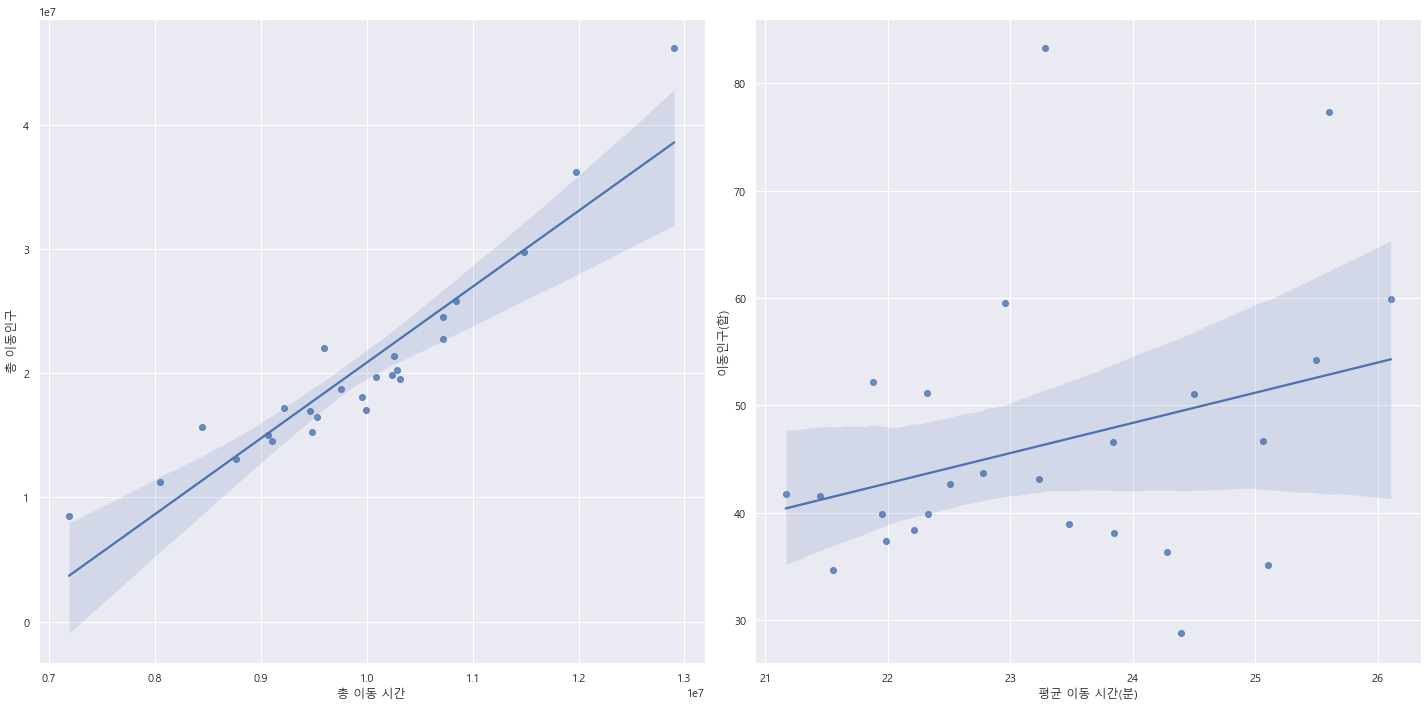

In [23]:
# 도착지 기준 이동시간 - 이동인구
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.regplot(data=arrival, x='총 이동 시간', y = '총 이동인구')
plt.subplot(1,2,2)
sns.regplot(data=arrival, x='평균 이동 시간(분)', y = '이동인구(합)')
plt.tight_layout()
plt.show()

In [27]:
# 총 이동시간과 총 인구이동의 상관관계가 있음
result = spst.pearsonr(arrival['총 이동 시간'], arrival['총 이동인구'])
print(f'합계 : {result}')
# 평균 이동 시간과 이동인구의 상관관계가 없음
result = spst.pearsonr(arrival['평균 이동 시간(분)'], arrival['이동인구(합)'])
print(f'평균 : {result}')

합계 : (0.934049797227354, 9.095861793625874e-12)
평균 : (0.3154400054054958, 0.1245449493648848)


In [30]:
only_seoul.to_csv('df_seoul_moving_default.csv', index=False)